In [8]:
import numpy as np
import networkx as nx
import pandas as pd
from datetime import datetime
import dynetx as dn
from tqdm import tqdm

In [2]:
datady=pd.read_csv('ln_data_dy.csv')

In [3]:
data=pd.read_csv('LN_data.csv')

In [4]:
data0=pd.read_csv('LN.txt')

In [5]:
data

,Unnamed: 0,node_ID1_index,node_ID2_index,openTimeArray,openTime,closeTimeArray,closeTime,weight
0,0,1,2,"time.struct_time(tm_year=2018, tm_mon=1, tm_md...",2018-01-12 05:49:23,0,0,37200
1,1,3,4,"time.struct_time(tm_year=2018, tm_mon=1, tm_md...",2018-01-14 08:14:12,0,0,1000000
2,2,3,4,"time.struct_time(tm_year=2018, tm_mon=1, tm_md...",2018-01-15 06:17:50,0,0,1000000
3,3,1,5,"time.struct_time(tm_year=2018, tm_mon=1, tm_md...",2018-01-15 11:16:41,0,0,200000
4,4,6,4,"time.struct_time(tm_year=2018, tm_mon=1, tm_md...",2018-01-15 11:32:16,0,0,2000000
...,...,...,...,...,...,...,...,...
313023,313023,26342,29312,"time.struct_time(tm_year=2022, tm_mon=1, tm_md...",2022-01-07 01:09:19,0,0,5000000
313024,313024,31693,3541,"time.struct_time(tm_year=2022, tm_mon=1, tm_md...",2022-01-07 01:09:19,0,0,2491294
313025,313025,860,10294,"time.struct_time(tm_year=2022, tm_mon=1, tm_md...",2022-01-07 01:19:15,0,0,9091212
313026,313026,23285,17069,"time.struct_time(tm_year=2022, tm_mon=1, tm_md...",2022-01-07 01:19:15,0,0,1500000


In [6]:
data0

,channel_ID,node_ID1,node_ID2,open_block,close_block,capacity,open_time,close_time
0,503816x1343x1,03bd3466efd4a7306b539e2314e69efc6b1eaee29734fc...,03c3d14714b78f03fd6ea4997c2b540a4139258249ea1d...,503816,-3,37200,1515732563,-2
1,504149x1124x0,02eccebd9ed98f6d267080a58194dbe554a2b33d976eb9...,02ee4469f2b686d5d02422917ac199602ce4c366a7bfaa...,504149,-3,1000000,1515914052,-2
2,504279x885x1,02eccebd9ed98f6d267080a58194dbe554a2b33d976eb9...,02ee4469f2b686d5d02422917ac199602ce4c366a7bfaa...,504279,-3,1000000,1515993470,-2
3,504310x2387x1,03bd3466efd4a7306b539e2314e69efc6b1eaee29734fc...,03cbf298b068300be33f06c947b9d3f00a0f0e8089da32...,504310,-3,200000,1516011401,-2
4,504311x1993x0,022e74ed3ddd3f590fd6492e60b20dcad7303f17e1ffd8...,02ee4469f2b686d5d02422917ac199602ce4c366a7bfaa...,504311,-3,2000000,1516012336,-2
...,...,...,...,...,...,...,...,...
313023,717513x1136x0,0371c434f14a3c977fbe3d5ebc37fec1af3546efa778aa...,03ac80331775d256eeb7438463e9cf1b986fcc77f84d95...,717513,-3,5000000,1641514159,-2
313024,717513x861x0,0205d9b3537e4c212c59a52e1a7fe7080b521f6f88b3fb...,03c2abfa93eacec04721c019644584424aab2ba4dff3ac...,717513,-3,2491294,1641514159,-2
313025,717514x1194x1,03864ef025fde8fb587d989186ce6a4a186895ee44a926...,038f8f113c580048d847d6949371726653e02b928196ba...,717514,-3,9091212,1641514755,-2
313026,717514x1625x1,023b2ef99b7d0bb66545ab20b2cd9453db6ca1e4487d11...,02f9169d3c0ee17e364559cbad9711eab4dc71d4ef4259...,717514,-3,1500000,1641514755,-2


In [7]:
g = dn.DynGraph(edge_removal=True)

In [9]:
for i in tqdm(range(len(data))):
    if data0['close_time'][i]==-2:      
        g.add_interaction(data['node_ID1_index'][i],data['node_ID2_index'][i],data0['open_time'][i])
       
    else:  
        g.add_interaction(data['node_ID1_index'][i],data['node_ID2_index'][i],data0['open_time'][i],data0['close_time'][i])
        

  1%|▊                                                                     | 3452/313028 [1:24:43<126:37:58,  1.47s/it]


KeyError: (646, 612, '-')

In [50]:
data

,Unnamed: 0,node_ID1_index,node_ID2_index,openTimeArray,openTime,closeTimeArray,closeTime,weight,seco
0,0,1,2,"time.struct_time(tm_year=2018, tm_mon=1, tm_md...",2018-01-12 05:49:23,0,0,37200,1.543643e+09
1,1,3,4,"time.struct_time(tm_year=2018, tm_mon=1, tm_md...",2018-01-14 08:14:12,0,0,1000000,1.515918e+09
2,2,3,4,"time.struct_time(tm_year=2018, tm_mon=1, tm_md...",2018-01-15 06:17:50,0,0,1000000,1.515997e+09
3,3,1,5,"time.struct_time(tm_year=2018, tm_mon=1, tm_md...",2018-01-15 11:16:41,0,0,200000,1.516015e+09
4,4,6,4,"time.struct_time(tm_year=2018, tm_mon=1, tm_md...",2018-01-15 11:32:16,0,0,2000000,1.516016e+09
...,...,...,...,...,...,...,...,...,...
313023,313023,26342,29312,"time.struct_time(tm_year=2022, tm_mon=1, tm_md...",2022-01-07 01:09:19,0,0,5000000,1.609008e+09
313024,313024,31693,3541,"time.struct_time(tm_year=2022, tm_mon=1, tm_md...",2022-01-07 01:09:19,0,0,2491294,1.609008e+09
313025,313025,860,10294,"time.struct_time(tm_year=2022, tm_mon=1, tm_md...",2022-01-07 01:19:15,0,0,9091212,1.609009e+09
313026,313026,23285,17069,"time.struct_time(tm_year=2022, tm_mon=1, tm_md...",2022-01-07 01:19:15,0,0,1500000,1.609009e+09


In [26]:
[g.add_interaction(data['node_ID1_index'][i],data['node_ID2_index'][i],data['openTime'][i],data['closeTime'][i]) for i in range(len(data))]


TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [28]:
type(data['openTime'][1])

str

In [19]:
g = dn.read_snapshots(datady, nodetype=int, timestamptype=int)

AttributeError: 'str' object has no attribute 'decode'

In [6]:
dfs = dict(tuple(data.groupby(data['openTime'])))

In [7]:
dfs

{'2018-01-12':    Unnamed: 0  node_ID1_index  node_ID2_index  \
 0           0               1               2   
 
                                        openTimeArray    openTime  \
 0  time.struct_time(tm_year=2018, tm_mon=1, tm_md...  2018-01-12   
 
   closeTimeArray closeTime  weight  
 0              0         0   37200  ,
 '2018-01-14':    Unnamed: 0  node_ID1_index  node_ID2_index  \
 1           1               3               4   
 
                                        openTimeArray    openTime  \
 1  time.struct_time(tm_year=2018, tm_mon=1, tm_md...  2018-01-14   
 
   closeTimeArray closeTime   weight  
 1              0         0  1000000  ,
 '2018-01-15':    Unnamed: 0  node_ID1_index  node_ID2_index  \
 2           2               3               4   
 3           3               1               5   
 4           4               6               4   
 5           5               6               3   
 6           6               3               5   
 
                

In [13]:
G=nx.from_pandas_edgelist(data, 'node_ID1_index', 'node_ID2_index', ['weight'])

In [11]:
G

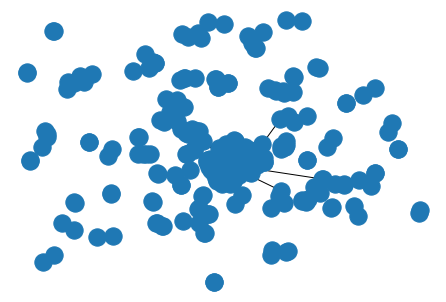

In [14]:
nx.draw(G)